In [23]:
#Import library
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

#Automatically creates a dataframe don't need pd.DataFrame
data = pd.read_csv("/Users/tianachargin/Desktop/PythonSG/STAT 4490/WidgeOne_CSV.csv")
#print out dataset
print(data)

    EmpID Plant Gender POSITION  JOBGRADE  PRDCTY SOCREL  YRONJOB  JOBSAT
0     100     D      M     HRLY         9   85.98      5     11.1     6.5
1      61     N      M      MGT         6   80.18      -     11.0     7.3
2      89     D      M      MGT         8   90.42      5      7.1     8.0
3      24     D      F     HRLY         7   91.81      6     10.1     6.5
4      16     D      F      MGT         9   91.81      5      0.1     8.5
5      75     N      M     HRLY         4   74.90      5      4.0     5.9
6      17     D      F      MGT         5   91.12      6      4.1     8.4
7      77     N      M     HRLY         5   76.01      5      5.0     6.2
8      14     D      F     HRLY         5   77.76      5     15.0     6.0
9       4     N      F      MGT         9   81.82      6      3.0     6.7
10     11     N      F     HRLY         4   78.24      6      5.0     5.4
11      5     N      F      MGT         9   80.67     10      7.0     7.2
12     91     D      M     HRLY       

### The class below, called Graphs, has ten different functions. The output for all, but one, is a different graph; all use the Pyplot library. There is an additional function that calculates the bin width for each histogram function. An object of the class has four parameters: two quantitative and two qualitative. 

In [63]:
class Graphs: 
#Constructor with parameters
    #Self isn't a pass by value parameter but it allows you to reference
    def __init__(self, quantVar1, quantVar2, qualVar1, qualVar2):   
        self.A = quantVar1   #First quantitative variable           
        self.B = quantVar2   #Second quantitative variable
        self.C = qualVar1    #First qualitative variable
        self.D = qualVar2    #Second qualitative variable 
        
#Function that calculates bin width for the histogram 
    def bin_width(self):
        #Import libaray
        import math
        
        #Create variable to create array for bins
        #Find min of column
        min = data[self.A].min()
        #Find max of column
        max = data[self.A].max()
        #Find the the count of rows (number of data/size/n)
        index = data.index
        number_of_rows = len(index) 
        #Calculate number of bins and round up
        num_of_bins = (math.ceil(math.sqrt(number_of_rows)))
        #Calculate bin width (max - min)/# of bins
        bin_size = ((max - min)/num_of_bins)
        #Round bin width to one decimal place
        increment_bin = round(bin_size, 1)
        #Start bin 
        start_bin = (min - increment_bin)
        #End bin
        end_bin = (max + increment_bin)
        
        return start_bin, end_bin, increment_bin
        
#Histogram Function 
    def histogram(self):
        #Import libraries
        import math
        import numpy as np
        import matplotlib.pyplot as plt
        
        #Create variable that we call the function to calculate the bin width
        bin = self.bin_width() 
         
        #Start at value = bin[0], Stop at value = bin[1], Increment by value of bin[2]
        bins = np.array(np.arange(start = bin[0], stop = bin[1], step = bin[2]))
        #Histogram function
        plt.hist(data[self.A], bins, label = self.A, color = "red")
        #x-axis label
        plt.xlabel(self.A, fontsize = 16)  
        #y-axis lable
        plt.ylabel("Frequency of " + self.A, fontsize = 16)
        #Title of graph
        plt.title("Histogram of " + self.A, loc = 'center')
        plt.show()
        return


#Stacked Histogram Function  
    def stacked_histogram(self):
        #Import libraries
        import numpy as np
        from matplotlib import pyplot as plt
        
        #Create combonations of the values for the two options
        data[self.C + "-" + self.D] = data[self.C] + " " + data[self.D] 
        combos = np.unique(data[self.C + "-" + self.D])
        #Create variable that we call the function to calculate the bin width
        bin = self.bin_width()
        #Start at value = bin[0], Stop at value = bin[1], Increment by value of bin[2]
        bins = np.array(np.arange(start = bin[0], stop = bin[1], step = bin[2]))
        
        #Create histogram
        for i in range(len(combos)):
           plt.hist(data[data[self.C + "-" + self.D].isin(combos[i:(len(combos))])][self.A], bins, label = combos[i:(len(combos))])
        #x-axis label
        plt.xlabel(self.A, fontsize = 16) 
        #y-axis lable
        plt.ylabel("Frequency of ", fontsize = 16)
        #Legend of graph
        plt.legend(loc = 'upper left')
        #Title of graph
        plt.title("Histogram of " + self.A + " with unique combinations of " + self.D + " and " + self.C, loc = 'center')
        plt.show()
        return
    

#Overlapping Histogram Function 
    def overlap_histogram(self):
        #Import libraries
        import numpy as np
        from matplotlib import pyplot as plt
        
        #Create variable that we call the function to calculate the bin width
        bin = self.bin_width()
        
        #Start at value = bin[0], Stop at value = bin[1], Increment by value of bin[2]
        bins = np.array(np.arange(start = bin[0], stop = bin[1], step = bin[2]))
        #Create histogram
        plt.hist(data[self.A], bins, alpha = 0.5, label = self.A, color = "red")
        plt.hist(data[self.B], bins, alpha = 0.5, label = self.B, color = "blue")
        #x-axis label
        plt.xlabel("Variables", fontsize = 16)  
        #y-axis lable
        plt.ylabel("Frequency", fontsize = 16)
        #Legend of graph
        plt.legend(loc = 'upper left')
        #Title of graph
        plt.title("Overlapping Histogram of Variables " + self.A + " and " + self.B, loc = 'center')
        plt.show()

    
#Pie Chart Function
    def pie_chart(self):    
        #Import library
        import matplotlib.pyplot as plt
        
        #Frequency Counts
        #Make a crosstab with Plant as the rows
        tabulation = pd.crosstab(index = data[self.C], columns = "count") 
        print(tabulation)
        #Pie chart function
        #colors will be defaulted 
        plt.pie(tabulation.values.reshape(-1), autopct = '%1.1f%%')
        #Legend of chart, output with unique values from parameter
        plt.legend(np.unique(data[self.C]))
        #Title of graph
        plt.title("Pie Chart of " + self.C, loc = 'center')
        plt.show()
        return

    
#Weighted Pie Chart Function
    def weighted_pie_chart(self):
        #Import libraries
        from matplotlib import pyplot as plt 
        import numpy as np
        
        #Stratified descriptive statistics        
        b = data.groupby(self.C)[self.A].sum() 
        print(b)
        #Pie chart function
        plt.pie(b, autopct = '%1.1f%%')
        #Legend of chart, output with unique values from parameter
        plt.legend(np.unique(data[self.C]))
        #Title of graph
        plt.title("Pie Chart of " + self.C + " Weighted by " + self.A, loc = 'center') 
        plt.show() 
        return
    
    
#Simple Scatter Plot Function
    def scatter_plot(self):
        #Import library
        from matplotlib import pyplot as plt
        
        #Scatter plot function 
        plt.scatter(data[self.B], data[self.A], marker = "o")
        #x-axis label
        plt.xlabel(self.B, fontsize = 16)  
        #y-axis label
        plt.ylabel(self.A, fontsize = 16)
        #Title of graph
        plt.title("Scatter Plot of " + self.A + " and " + self.B , loc = 'center')
        plt.show()
        
        
#Simple Scatter Plot with Regression Line Function
    def scatter_with_reg_line(self): 
        #Import libraries
        from matplotlib import pyplot as plt    
        from statistics import mean
        
        #Create an array that will hold values from parameter 
        xs = np.array((data[self.B]), dtype = np.float64)
        #Create an array that will hold values from parameter
        ys = np.array((data[self.A]), dtype = np.float64)

        #Function to calculate the slope and intercept
        def best_fit_slope_and_intercept(xs, ys):
            #Calculate slope
            m = (((mean(xs)*mean(ys)) - mean(xs*ys)) / ((mean(xs)*mean(xs)) - mean(xs*xs)))
            #Calculate intercept 
            b = mean(ys) - (m*mean(xs))
            return m, b 
        
        #Variable that will hold slope adn intercept values    
        m, b = best_fit_slope_and_intercept(xs, ys)
        print("The slope of the line is " + str(m) + " and the intercept of the line is " + str(b))
        #Calculate the regression line    
        regression_line = [(m*x)+b for x in xs] 
        
        #Scatter plot function    
        plt.scatter(data[self.B], data[self.A], marker = "o")
        #x-axis label
        plt.xlabel(self.B, fontsize = 16)  
        #y-axis label
        plt.ylabel(self.A, fontsize = 16)
        #Add regression line to graph
        plt.plot(xs, regression_line)
        #Title of graph
        plt.title("Scatter Plot of " + self.A + " and " + self.B + " with Regression Line", loc = 'center')
        
        
#Grouped Scatter Plot Function
    def grouped_scatter_plot(self): 
        #Import library
        from matplotlib import pyplot as plt  
        
        #Create grouping of two variables 
        groups = data.groupby([self.C, self.D]) 
        
        #Forloop to iterate through groups
        for name, group in groups: 
            #Scatter plot function 
            plt.scatter(group[self.B], group[self.A], marker = "o", label = name)
        #x-axis label
        plt.xlabel(self.B, fontsize = 16)  
        #y-axis label
        plt.ylabel(self.A, fontsize = 16)
        #Legend of graph
        plt.legend()
        #Title of graph
        plt.title("Scatter Plot of " + self.B + " and " + self.A + " by " + self.C + " and " + self.D, loc = 'center')
        
        

#Scatter Plot with Regression Line Function
    def grouped_scatter_with_reg_line(self): 
        #Import library
        from matplotlib import pyplot as plt
        
        #Create grouping of two variables 
        groups = data.groupby([self.C, self.D]) 
        
        print("The following is listed in descending order according to the legend:")
        
        #Forloop to iterate through groups
        for name, group in groups:
            #Import library
            from statistics import mean
            
            #Create an array that will hold values from parameter
            xs = np.array((group[self.B]), dtype = np.float64)
            #Create an array that will hold values from parameter
            ys = np.array((group[self.A]), dtype = np.float64)

            #Function to calculate the slope and intercept of the line
            def best_fit_slope_and_intercept(xs,ys):
                #Calculate slope
                m = (((mean(xs)*mean(ys)) - mean(xs*ys)) / ((mean(xs)*mean(xs)) - mean(xs*xs)))
                #Calcuate intercept 
                b = mean(ys) - (m*mean(xs))
                return m, b 
            
            #Variable that will hold slope adn intercept values 
            m, b = best_fit_slope_and_intercept(xs, ys)
            print("The slope of the line is " + str(m) + " and the intercept of the line is " + str(b))
            #Calculate the regression line     
            regression_line = [(m*x)+b for x in xs] 
            
            #Scatter plot function 
            plt.scatter(group[self.B], group[self.A], marker = "o", label = name)
            #x-axis label
            plt.xlabel(self.B, fontsize = 16)  
            #y-axis label
            plt.ylabel(self.A, fontsize = 16)
            #Add regression line to graph
            plt.plot(xs, regression_line)
        #Legend of graph
        plt.legend()
        #Title of graph
        plt.title("Scatter Plot of " + self.B + " and " + self.A + " by " + self.C + " and " + self.D + " with Regression Lines", loc='center')

### Histogram with one quantitative variable 'YRONJON'.

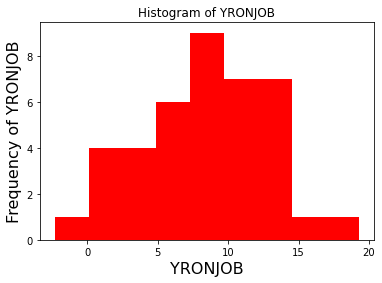

In [64]:
#Create an object from class Graphs that will have one parameter
histo = Graphs('YRONJOB', None, None, None)
#Call histogram() function to apply to object
histo.histogram()

### Stacked histogram for 'JOBSAT' with unique combinations of qualitative variables 'Gender' and 'POSITION'.

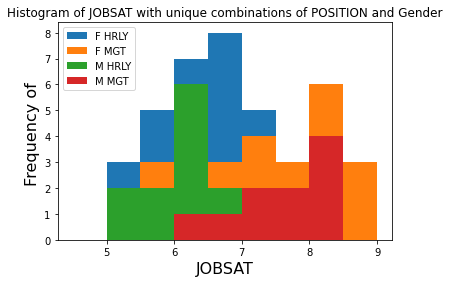

In [65]:
#Create an object from class Graphs that will have three parameters
stacked_histo = Graphs('JOBSAT', None, 'Gender', 'POSITION')
#Call stacked_histogram() function to apply to object
stacked_histo.stacked_histogram()

### Overlapping histogram with two quantitative variables 'YRONJOB' and 'JOBSAT'.

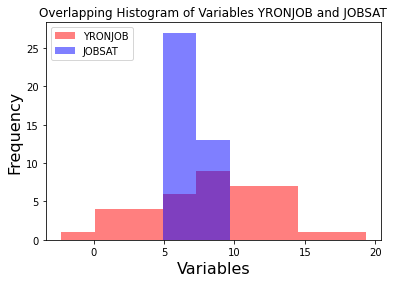

In [66]:
#Create an object from class Graphs that will have two parameters
overlap_histo = Graphs('YRONJOB', 'JOBSAT', None, None)
#Call overlap_histogram() function to apply to object
overlap_histo.overlap_histogram()

### Pie chart for qualitative variable 'Plant' .

col_0  count
Plant       
D         23
N         17


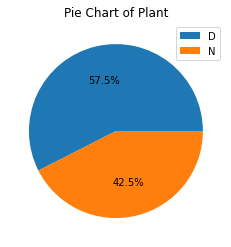

In [36]:
#Create an object from class Graphs that will have one parameter
pie_chart = Graphs(None, None, 'Plant', None)
#Call pie_chart() function to apply to object
pie_chart.pie_chart()

### Pie chart for 'Plant' that’s weighted by 'YRONJOB'.

Plant
D    186.4
N    145.2
Name: YRONJOB, dtype: float64


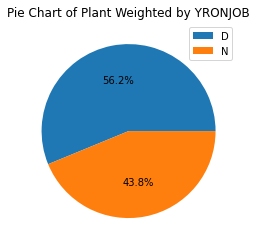

In [37]:
#Create an object from class Graphs that will have two parameter
weighted_pie_chart = Graphs('YRONJOB', None, 'Plant', None)
#Call weighted_pie_chart() function to apply to object
weighted_pie_chart.weighted_pie_chart()

### Scatter plot of quantatitive variables 'JOBSAT' and 'YRONJOB'.

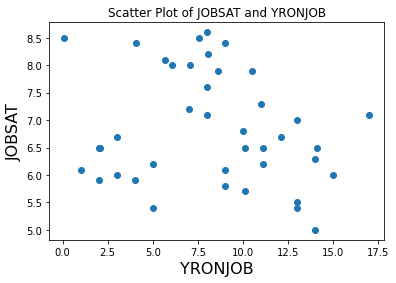

In [38]:
#Create an object from class Graphs that will have two parameter
scat_plot = Graphs('JOBSAT', 'YRONJOB', None, None)
#Call scatter_plot() function to apply to object
scat_plot.scatter_plot()

### Scatter plot from above with added regression line.

The slope of the line is -0.04518720210128208 and the intercept of the line is 7.224601905419628


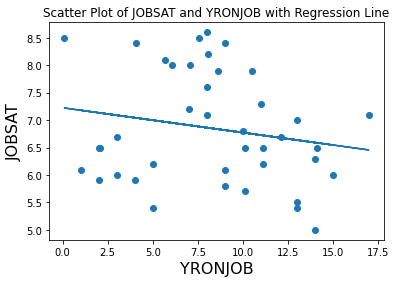

In [39]:
#Create an object from class Graphs that will have two parameter
scat_with_line = Graphs('JOBSAT', 'YRONJOB', None, None)
#Call scatter_with_reg_line() function to apply to object
scat_with_line.scatter_with_reg_line()

### Scatter plot of quantitative variables 'YRONJOB' and 'JOBSAT' by color code for unique combinations of qualitative variables 'Gender' and 'POSITION'.

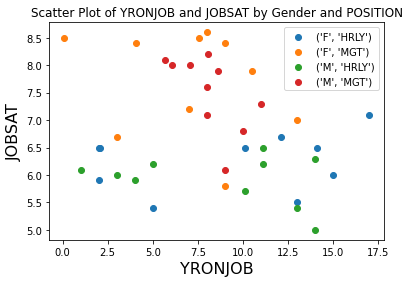

In [40]:
#Create an object from class Graphs that will have four parameter
grouped_scatter = Graphs('JOBSAT', 'YRONJOB', 'Gender', 'POSITION')
#Call grouped_scatter_plot() function to apply to object
grouped_scatter.grouped_scatter_plot()

### Scatter plot from above with added regression lines.

The following is listed in descending order according to the legend:
The slope of the line is 0.024201565009048475 and the intercept of the line is 6.036377539316392
The slope of the line is -0.06233537513227938 and the intercept of the line is 8.144451224693151
The slope of the line is -0.0283732339180469 and the intercept of the line is 6.174861008712744
The slope of the line is -0.24706178643384763 and the intercept of the line is 9.526024177300197


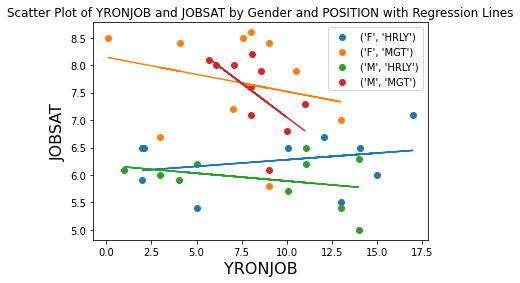

In [41]:
#Create an object from class Graphs that will have four parameter
grouped_scat_with_line = Graphs('JOBSAT', 'YRONJOB', 'Gender', 'POSITION')
#Call grouped_scatter_with_reg_line() function to apply to object
grouped_scat_with_line.grouped_scatter_with_reg_line()